# ⚛️ Optimización de Carteras con Computación Cuántica Adiabática
**Autor:** Guillermo Burges Bruna | **TFG Grado en Física**

Este notebook demuestra el flujo completo del proyecto:
1.  **Datos:** Descarga de datos financieros reales (Yahoo Finance).
2.  **Modelado:** Transformación del problema de Markowitz a un Hamiltoniano de Ising ($H_{Ising}$).
3.  **Solver Clásico:** Resolución mediante *Simulated Annealing* (basado en Monte Carlo).
4.  **Simulación Cuántica:** Evolución adiabática resolviendo la Ecuación de Schrödinger dependiente del tiempo y análisis del *Gap Espectral*.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Añadimos la carpeta 'src' al path del sistema para importar tus módulos propios
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Importamos las clases personalizadas desde la carpeta 'src'
from qubo_model import QuboFormulation
from quantum_dynamics_lineal import IsingEvolver
from quantum_dynamics_logarithmic import IsingEvolver
from solvers import PortfolioSolver

import time
from functools import reduce
from itertools import chain, combinations

from scipy.sparse.linalg import eigsh
import pandas as pd


from quimb import kron, ikron, pkron, sparse, pauli, expec
from quimb.gen.operators import ham_ising

import quimb as qu


from pathlib import Path
import json

from dimod import BinaryQuadraticModel

print(" Entorno configurado y módulos cargados.")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\dielm\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\dielm\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\dielm\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\dielm\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\dielm\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\dielm\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\dielm\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\dielm\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\dielm\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\dielm\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\dielm\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\dielm\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\dielm\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\dielm\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\dielm\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\dielm\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



C:\Users\dielm\AppData\Roaming\Python\Python312\site-packages\cotengra\hyperoptimizers\hyper.py:54: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(
C:\Users\dielm\AppData\Roaming\Python\Python312\site-packages\cotengra\hyperoptimizers\hyper.py:36: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(
C:\Users\dielm\AppData\Roaming\Python\Python312\site-packages\cotengra\hyperoptimizers\hyper.py:73: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(


 Entorno configurado y módulos cargados.


### 1. Configuración del Entorno y Datos de Mercado
Importamos las librerías necesarias, incluyendo nuestro módulo propio `src` donde residen las clases del motor físico y el modelo QUBO.

A continuación, descargamos datos históricos reales para una selección de activos (tickers). Calculamos:
* **Retornos Esperados ($\mu$):** Media histórica.
* **Matriz de Riesgo ($\Sigma$):** Covarianza entre activos.

In [2]:
# --- CONFIGURACIÓN DEL ESCENARIO ---
# Seleccionamos una cartera con correlación alta (ejemplo del TFG)
tickers = ['CAT', 'NFLX', 'CF', 'ROK'] 
presupuesto = 1000      # Euros (Mantenemos bajo para que la simulación cuántica sea rápida)
start_date = '2018-01-01'
end_date = '2020-01-01'

print(f" Descargando datos para: {tickers}...")

# Descarga de Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Re-muestreo mensual (Business Month End) como indica la metodología
df_monthly = data.resample('BME').last()

# Cálculo de Retornos (mu) y Covarianzas (sigma)
retornos = df_monthly.pct_change().dropna()
mu = retornos.mean().values
sigma = retornos.cov().values
precios_actuales = df_monthly.iloc[-1].values

print("\n Datos de Mercado Procesados:")
print(f"   - Rendimientos esperados (mu): {np.round(mu, 4)}")
print(f"   - Volatilidad (diagonal sigma): {np.round(np.diag(sigma), 4)}")
print(f"   - Precios actuales: {precios_actuales}")

 Descargando datos para: ['CAT', 'NFLX', 'CF', 'ROK']...


C:\Users\dielm\AppData\Local\Temp\ipykernel_4956\2931767343.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  4 of 4 completed


 Datos de Mercado Procesados:
   - Rendimientos esperados (mu): [0.0014 0.0104 0.013  0.0068]
   - Volatilidad (diagonal sigma): [0.0074 0.0062 0.0109 0.0076]
   - Precios actuales: [130.35917664  41.2070694   32.35699844 182.44717407]


### 2. Formulación del Modelo QUBO (Ising)
Para que un ordenador cuántico (o un sampler inspirado en cuántica) pueda resolver el problema, debemos traducir la función de coste financiera a un **Hamiltoniano de Ising**:

$$H(\sigma) = \sum h_i \sigma_i + \sum J_{ij} \sigma_i \sigma_j$$

Utilizamos una **codificación logarítmica** (bits de potencia de 2) para discretizar la cantidad de acciones a comprar, optimizando el uso de qubits.

* **Objetivo:** Minimizar $E = \text{Riesgo} - \text{Retorno} + \text{Penalización}(Presupuesto)$.

In [3]:
# Instanciamos tu clase de formulación QUBO
# Alpha = 0.5 (Equilibrio riesgo/beneficio)
q_model = QuboFormulation(mu, sigma, presupuesto, precios_actuales, risk_aversion=0.5)

# Obtenemos los coeficientes del Hamiltoniano de Ising
h, J, offset = q_model.get_ising_coefficients()

print(f" Problema mapeado al Modelo de Ising:")
print(f"   - Total Qubits necesarios: {q_model.total_qubits}")
print(f"   - Distribución de bits por activo: {q_model.bits_per_asset}")
print(f"   - Número de interacciones (acoplamientos J): {len(J)}")

 Problema mapeado al Modelo de Ising:
   - Total Qubits necesarios: 16
   - Distribución de bits por activo: [3, 5, 5, 3]
   - Número de interacciones (acoplamientos J): 120


### 3. Resolución Clásica: Simulated Annealing
Antes de pasar al régimen cuántico, establecemos una línea base (benchmark) utilizando **Simulated Annealing**. Este algoritmo heurístico imita el enfriamiento térmico clásico para escapar de mínimos locales.

Visualizaremos la **Frontera Eficiente** para verificar que las soluciones encontradas tienen sentido financiero (relación óptima riesgo/beneficio).

In [4]:
solver_classico = PortfolioSolver(h, J)
print(" Ejecutando Simulated Annealing...")

# AHORA RECIBIMOS 3 VARIABLES
best_sample, best_energy, sampleset = solver_classico.solve_simulated_annealing(num_reads=2000) 

print(f"\n Energía Mínima encontrada: {best_energy:.4f}")

 Ejecutando Simulated Annealing...
Ejecutando Simulated Annealing Clásico (2000 muestras)...
Terminado en 0.6926 segundos.

 Energía Mínima encontrada: -2023373.4782


Ejecutando Simulated Annealing (2000 reads)...
Ejecutando Simulated Annealing Clásico (2000 muestras)...
Terminado en 0.6805 segundos.

 Energía Mínima: -2023373.4782
 Generando mapa de calor Riesgo-Beneficio...


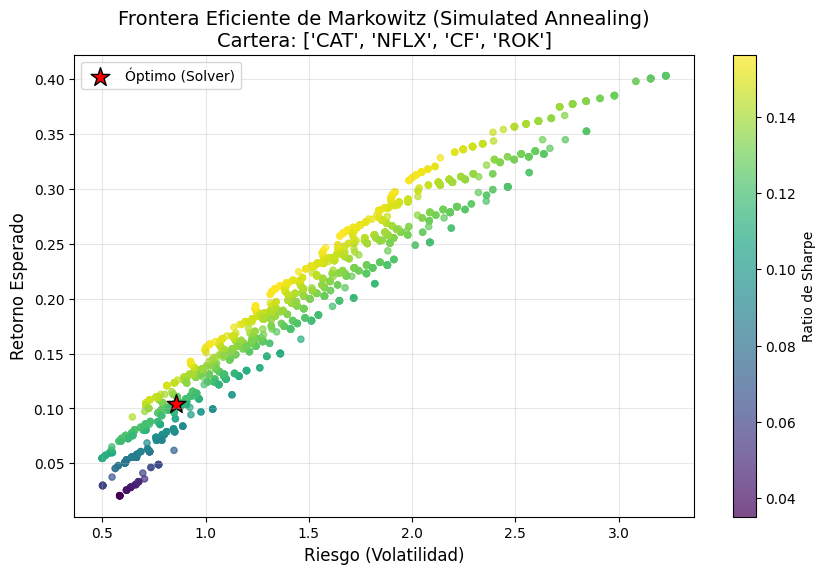

In [5]:
# 1. Ejecutamos el Solver Clásico
solver_classico = PortfolioSolver(h, J)
print("Ejecutando Simulated Annealing (2000 reads)...")

# IMPORTANTE: Aquí recuperamos 'sampleset', que contiene TODAS las soluciones (no solo la mejor)
best_sample, best_energy, sampleset = solver_classico.solve_simulated_annealing(num_reads=2000)

print(f"\n Energía Mínima: {best_energy:.4f}")

# 2. Procesamos los datos para el gráfico 
print(" Generando mapa de calor Riesgo-Beneficio...")

riesgos = []
retornos = []
sharpes = []

# Iteramos sobre CADA solución encontrada por el solver
for sample, energy in sampleset.data(['sample', 'energy']):
    # Usamos la función auxiliar para pasar de bits -> acciones
    acciones = q_model.decode_sample(sample) 
    
    # Calculamos métricas reales (Markowitz)
    ret_val = np.dot(mu, acciones)
    riesgo_val = np.sqrt(np.dot(acciones, np.dot(sigma, acciones)))
    coste = np.dot(acciones, precios_actuales)
    
    # Filtro: Solo pintamos las carteras válidas (dentro del presupuesto)
    if 0 < coste <= presupuesto * 1.05: 
        riesgos.append(riesgo_val)
        retornos.append(ret_val)
        
        # Ratio de Sharpe (Retorno / Riesgo)
        if riesgo_val > 0:
            sharpes.append(ret_val / riesgo_val)
        else:
            sharpes.append(0)

# 3. Ploteamos la Frontera Eficiente
plt.figure(figsize=(10, 6))

# Nube de puntos (Todas las soluciones exploradas)
sc = plt.scatter(riesgos, retornos, c=sharpes, cmap='viridis', s=20, alpha=0.7)
plt.colorbar(sc, label='Ratio de Sharpe')

# Destacamos la solución "Ganadora" (Estrella Roja)
acc_opt = q_model.decode_sample(best_sample)
ret_opt = np.dot(mu, acc_opt)
riesgo_opt = np.sqrt(np.dot(acc_opt, np.dot(sigma, acc_opt)))

plt.scatter(riesgo_opt, ret_opt, c='red', s=200, marker='*', edgecolors='black', label='Óptimo (Solver)')

plt.title(f'Frontera Eficiente de Markowitz (Simulated Annealing)\nCartera: {tickers}', fontsize=14)
plt.xlabel('Riesgo (Volatilidad)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
def interpretar_solucion(sample, model):
    """Función auxiliar para traducir bits a acciones"""
    shares = [0] * model.num_assets
    # Reconstruimos el número entero a partir de los bits binarios
    for i in range(model.num_assets):
        current_shares = 0
        for bit_info in model.qubit_map[i]:
            # Miramos si el qubit correspondiente está en +1 (1) o -1 (0)
            # Nota: dimod devuelve {idx: 1} o {idx: -1}. Convertimos a 0/1.
            val_spin = sample[bit_info['global_index']]
            val_bit = 1 if val_spin > 0 else 0
            current_shares += val_bit * bit_info['power']
        shares[i] = current_shares
    return shares

# Decodificamos la solución
acciones_compradas = interpretar_solucion(best_sample, q_model)
gasto_total = sum(acc * prec for acc, prec in zip(acciones_compradas, precios_actuales))

print(" CARTERA ÓPTIMA RECOMENDADA:")
for ticker, n in zip(tickers, acciones_compradas):
    print(f"   - {ticker}: {n} acciones")
print(f"   -------------------------")
print(f"   Gasto Total: {gasto_total:.2f}€ / {presupuesto}€")

 CARTERA ÓPTIMA RECOMENDADA:
   - CAT: 3 acciones
   - NFLX: 2 acciones
   - CF: 5 acciones
   - ROK: 2 acciones
   -------------------------
   Gasto Total: 1000.17€ / 1000€


### 3.2. Generación de la Frontera Eficiente: Barrido de Aversión al Riesgo ($\alpha$)

Una vez validado el modelo para un caso particular, el siguiente paso es construir la **Frontera Eficiente de Markowitz**. Esta curva representa el conjunto de carteras óptimas que ofrecen el máximo retorno esperado para un nivel de riesgo definido.

Para generarla mediante computación cuántica (o inspirada en cuántica), realizamos un **Análisis de Sensibilidad** sobre el parámetro de aversión al riesgo $\alpha$ en la función objetivo QUBO:

$$H(x) = \alpha \cdot \underbrace{\left(\sum_{i,j} \sigma_{ij} x_i x_j\right)}_{\text{Riesgo}} - \underbrace{\sum_{i} \mu_i x_i}_{\text{Retorno}} + \text{Penalizaciones}$$

#### Rango Dinámico de $\alpha$
Dado que numéricamente la varianza ($\sigma^2 \approx 10^{-4}$) suele ser mucho menor que los retornos ($\mu \approx 10^{-2}$), necesitamos un rango amplio y logarítmico para observar cambios de comportamiento reales en el solver:

1.  **$\alpha \approx 0.05$ (Perfil Agresivo):** El término de riesgo es despreciable. El sistema busca puramente maximizar $\mu$, aceptando alta volatilidad.
2.  **$\alpha \approx 2.0$ (Perfil Equilibrado):** Balance estándar entre seguridad y beneficio.
3.  **$\alpha \approx 100$ (Perfil Conservador):** El término de riesgo domina el Hamiltoniano. El sistema penaliza fuertemente cualquier volatilidad, buscando la cartera de mínima varianza global.

> **Nota Técnica:** Ejecutamos el solver *Simulated Annealing* iterativamente barriendo estos valores para trazar la curva.

 Generando Frontera Eficiente (Barrido de Alpha)...
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1651 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1833 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1663 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1668 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1834 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1667 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1829 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1663 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1731 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1794 segundos.
Ejecutando Simulated Annealing Clásico (500 muestras)...
Terminado en 0.1648 s

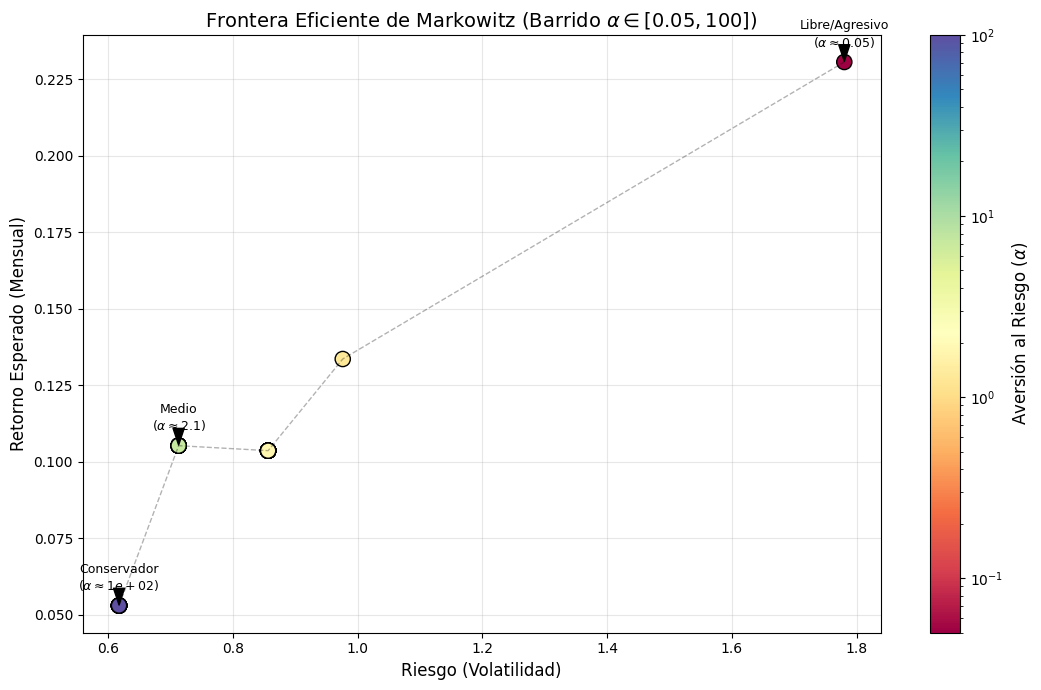

In [7]:

# ---------------------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# Definimos los perfiles según tu criterio:
# 0.05 (Libre/Agresivo) <---> 2.0 (Medio) <---> 100 (Conservador)
print(" Generando Frontera Eficiente (Barrido de Alpha)...")

# Usamos escala logarítmica para cubrir bien desde 0.05 hasta 100
alphas_to_test = np.geomspace(0.05, 100, 50) 

frontier_risks = []
frontier_returns = []
frontier_colors = []

for alpha in alphas_to_test:
    # 1. Re-formulamos el QUBO con el nuevo alpha
    #    Nota: En tu modelo, Alpha multiplica al término de Riesgo (Sigma)
    temp_model = QuboFormulation(mu, sigma, presupuesto, precios_actuales, risk_aversion=alpha)
    h_temp, J_temp, _ = temp_model.get_ising_coefficients()
    
    # 2. Resolvemos con Simulated Annealing (rápido para la demo)
    temp_solver = PortfolioSolver(h_temp, J_temp)
    best_s, _, _ = temp_solver.solve_simulated_annealing(num_reads=500)
    
    # 3. Calculamos métricas reales financieras
    acciones = temp_model.decode_sample(best_s)
    
    ret_val = np.dot(mu, acciones)
    # Riesgo = sqrt(x^T * Sigma * x)
    risk_val = np.sqrt(np.dot(acciones, np.dot(sigma, acciones)))
    coste = np.dot(acciones, precios_actuales)
    
    # Solo guardamos si respeta el presupuesto (aprox 5% margen)
    if 0 < coste <= presupuesto * 1.05:
        frontier_risks.append(risk_val)
        frontier_returns.append(ret_val)
        frontier_colors.append(alpha) # Guardamos alpha para el color

# --- PLOT DE LA FRONTERA EFICIENTE ---
plt.figure(figsize=(11, 7))

# Scatter plot coloreado por Alpha (usamos log norm para que se vean bien los colores)
from matplotlib.colors import LogNorm
sc = plt.scatter(frontier_risks, frontier_returns, c=frontier_colors, 
                 cmap='Spectral', s=120, edgecolors='black', norm=LogNorm())

# Unimos los puntos para ver la curva
# (Ordenamos por riesgo para que la línea salga limpia)
sorted_indices = np.argsort(frontier_risks)
plt.plot(np.array(frontier_risks)[sorted_indices], 
         np.array(frontier_returns)[sorted_indices], 
         'k--', alpha=0.3, linewidth=1)

# Barra de color
cbar = plt.colorbar(sc)
cbar.set_label(r'Aversión al Riesgo ($\alpha$)', fontsize=12)

# Etiquetas y Título
plt.title(f'Frontera Eficiente de Markowitz (Barrido $\\alpha \\in [0.05, 100]$)', fontsize=14)
plt.xlabel('Riesgo (Volatilidad)', fontsize=12)
plt.ylabel('Retorno Esperado (Mensual)', fontsize=12)
plt.grid(True, alpha=0.3)

# Anotaciones de tus perfiles clave
# Buscamos el punto más cercano a tus valores deseados para señalarlo
for alpha_target, label in [(0.05, "Libre/Agresivo"), (2.0, "Medio"), (100, "Conservador")]:
    # Encontrar el índice del alpha más cercano probado
    idx = (np.abs(np.array(frontier_colors) - alpha_target)).argmin()
    
    plt.annotate(f'{label}\n($\\alpha \\approx {frontier_colors[idx]:.2g}$)',
                 xy=(frontier_risks[idx], frontier_returns[idx]),
                 xytext=(frontier_risks[idx], frontier_returns[idx] + 0.005),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                 fontsize=9, ha='center')

plt.tight_layout()
plt.show()

### 4. Dinámica Cuántica Adiabática (Simulación)
Aquí entramos en el núcleo físico del TFG. Simulamos la evolución temporal del sistema siguiendo el **Teorema Adiabático**:

$$H(t) = (1-s(t)) H_{driver} + s(t) H_{problem}$$

El sistema comienza en el estado fundamental de $H_{driver}$ (superposición fácil de preparar) y evoluciona lentamente hacia $H_{problem}$. Si la evolución es suficientemente lenta (adiabática), el sistema permanecerá en el estado fundamental, revelando la solución óptima.

> **Nota:** Utilizamos un motor basado en `quimb` para diagonalizar el Hamiltoniano paso a paso.

In [ ]:

from quantum_dynamics_lineal import IsingEvolver 
import time

# Parámetros de la simulación
PASOS = 50       # Número de pasos de tiempo (más pasos = más resolución)
G_DRIVER = 2.0   # Fuerza del campo transversal inicial
NIVELES_K = 4    # Calculamos E0, E1, E2, E3

print(f" Inicializando Motor Cuántico para {q_model.total_qubits} qubits...")

# 1. Instanciamos el motor
evolver = IsingEvolver(h, J, q_model.total_qubits, g=G_DRIVER, k=NIVELES_K) 

# 2. Ejecutamos la trayectoria
#    Los resultados se guardan en la variable global 'df_results'
print(f" Ejecutando evolución adiabática ({PASOS} pasos)...")
start_t = time.time()

df_results_linear = evolver.analyze_adiabatic_path(steps=PASOS)

print(f" Simulación completada en {time.time() - start_t:.2f} s.")
print(f"   Datos listos en variable 'df_results'. Pasa a la siguiente celda para graficar.")

 Inicializando Motor Cuántico para 16 qubits...
Motor Quimb (Gap Relativo): 16 qubits


c:\Users\dielm\anaconda3\Lib\site-packages\scipy\sparse\_data.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  self.data.astype(dtype, casting=casting, copy=True),


 Ejecutando evolución adiabática (50 pasos)...
Simulando trayectoria (Gap Relativo, 50 pasos)...
Completado en 77.11 s
 Simulación completada en 77.11 s.
   Datos listos en variable 'df_results'. Pasa a la siguiente celda para graficar.


### 4.1. Análisis del Espectro de Energía y Gap
Visualizamos la "historia energética" del sistema.

* **Arriba (Espectro Completo):** Muestra cómo los niveles de energía ($E_0, E_1, E_2...$) cambian con el tiempo.
* **Abajo (Gaps Relativos):** Analizamos la separación entre el estado fundamental y los excitados:
    $$\Delta_{rel} = \frac{E_i - E_0}{E_{max} - E_0}$$

**Interpretación Física:**
El punto donde el **Gap ($E_1 - E_0$)** es mínimo representa el "cuello de botella" del algoritmo. Un gap que se cierra casi a cero indica una transición de fase cuántica y una alta probabilidad de error (transiciones de Landau-Zener).

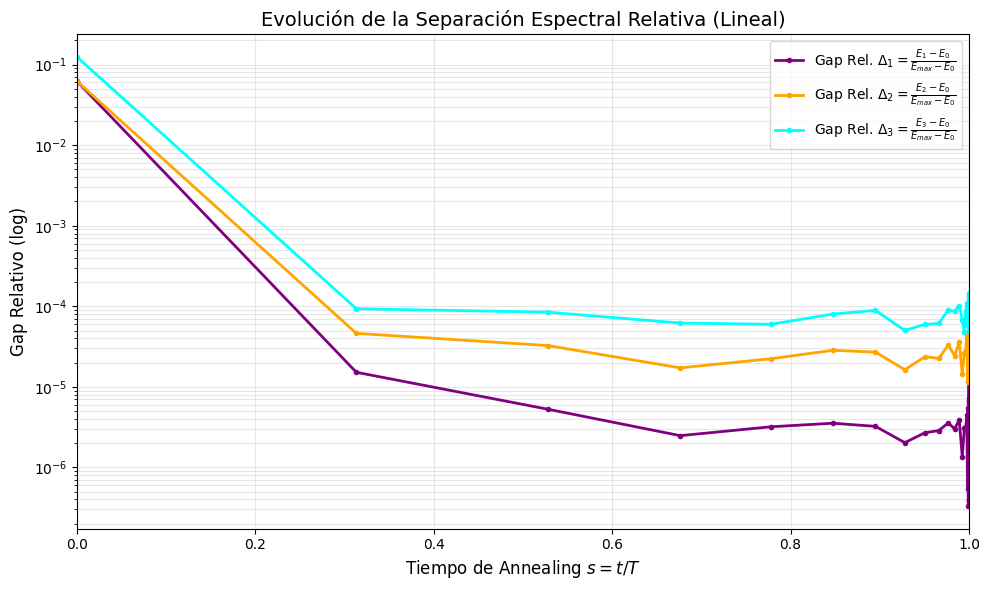


⚛️ ESTADO FINAL DEL SISTEMA (t=1.0):
   - Gap Relativo (E1): 1.56e-06
   - Energía Base (E0): -2023373.3823
   - Configuración:     [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

💰 CARTERA FINAL SELECCIONADA (Coste: 1000.17€):
   - CAT: 3 u.
   - NFLX: 2 u.
   - CF: 5 u.
   - ROK: 2 u.


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Verificamos que existan datos de la simulación lineal
if 'df_results_linear' not in locals():
    raise ValueError("⚠️ ¡Ejecuta primero la celda de simulación (7a) para generar 'df_results_linear'!")

# --- PREPARACIÓN DE DATOS ---
t_values_linear = df_results_linear['t'].values
# Eje X: Tiempo lineal directo
x_axis_linear = t_values_linear 

# Calculamos ancho de banda W = Emax - E0 para normalizar
width_linear = df_results_linear['Emax'] - df_results_linear['E0']
width_linear = width_linear.replace(0, 1.0) # Evitar división por cero

# ------------------------------------------------------------------------------
# GRÁFICO: GAPS RELATIVOS MÚLTIPLES EN ESCALA LINEAL
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))

gaps_a_pintar = [1, 2, 3] 
colores_gaps = ['purple', 'orange', 'cyan']

for i, color in zip(gaps_a_pintar, colores_gaps):
    col_name = f'E{i}'
    if col_name in df_results_linear.columns:
        # Gap Absoluto: Ei - E0
        gap_abs = df_results_linear[col_name] - df_results_linear['E0']
        # Gap Relativo: (Ei - E0) / W
        gap_rel = gap_abs / width_linear
        
        plt.plot(x_axis_linear, gap_rel, '.-', color=color, linewidth=2, 
                 label=r'Gap Rel. $\Delta_{%d} = \frac{E_%d - E_0}{E_{max} - E_0}$' % (i, i))

plt.xlabel(r"Tiempo de Annealing $s = t/T$", fontsize=12)
plt.ylabel("Gap Relativo (log)", fontsize=12)
plt.title("Evolución de la Separación Espectral Relativa (Lineal)", fontsize=14)
plt.yscale('log') # RECOMENDADO: Escala log para ver detalles finos del cierre del gap
plt.legend(loc='best')
plt.grid(True, alpha=0.3, which='both')
plt.xlim(0, 1) # Asegurar rango completo
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# REPORTE DE RESULTADOS
# ------------------------------------------------------------------------------
final = df_results_linear.iloc[-1]
solucion_bits = final['best_bits']
gap_final_rel = final['gap_rel']

print(f"\n⚛️ ESTADO FINAL DEL SISTEMA (t=1.0):")
print(f"   - Gap Relativo (E1): {gap_final_rel:.2e}")
print(f"   - Energía Base (E0): {final['E0']:.4f}")
print(f"   - Configuración:     {solucion_bits}")

# Interpretación Financiera
acciones = q_model.decode_sample(solucion_bits)
coste = np.dot(acciones, precios_actuales)

print(f"\n💰 CARTERA FINAL SELECCIONADA (Coste: {coste:.2f}€):")
for t, n in zip(tickers, acciones):
    print(f"   - {t}: {n} u.")

### 4.2. Análisis Crítico: La Necesidad de una Escala Logarítmica

Las gráficas anteriores muestran la evolución de los niveles de energía en función del tiempo lineal de annealing $s = t/T \in [0, 1]$. Aunque ofrecen una visión general correcta, presentan una limitación fundamental para el análisis de complejidad:

1.  **Ocultamiento de la Transición de Fase:** En la escala lineal, el cierre del gap ($\Delta E = E_1 - E_0$) hacia el final del proceso ($s \to 1$) parece una convergencia suave a cero. Sin embargo, la física crítica ocurre precisamente en esa región infinitesimal final.
2.  **Régimen de *Spin Glass*:** A medida que $s \to 1$, el sistema entra en una fase de **Vidrio de Espín** caracterizada por frustración magnética y un paisaje de energía rugoso. En esta fase, los estados excitados colapsan exponencialmente cerca del fundamental.
3.  **Complejidad Computacional:** El Teorema Adiabático establece que el tiempo requerido escala como $T \sim \Delta_{min}^{-2}$. Un gap de $10^{-2}$ vs $10^{-6}$ implica una diferencia de tiempo de ejecución de 8 órdenes de magnitud, algo indistinguible a simple vista en una gráfica lineal.

**🔎 Cambio de Perspectiva:**
Para visualizar correctamente la estructura fina del espectro y detectar el verdadero "cuello de botella" cuántico, aplicamos una transformación de **escala logarítmica inversa** al eje temporal:

$$x = \log_{10}(1 - s + \epsilon)$$

Esto "estira" drásticamente la región final del proceso, permitiéndonos observar:
* El valor exacto del **Gap Mínimo**.
* La presencia de **cruzamientos evitados** (*avoided crossings*) y degeneración.
* La separación relativa de los estados excitados superiores.

A continuación, repetimos el análisis visual bajo esta nueva métrica para revelar la verdadera dureza del problema.

In [10]:

from quantum_dynamics_logarithmic import IsingEvolver
import time

# Parámetros de la simulación
PASOS = 50       # Número de pasos de tiempo (más pasos = más resolución)
G_DRIVER = 2.0   # Fuerza del campo transversal inicial
NIVELES_K = 4    # Calculamos E0, E1, E2, E3

print(f" Inicializando Motor Cuántico para {q_model.total_qubits} qubits...")

# 1. Instanciamos el motor
evolver = IsingEvolver(h, J, q_model.total_qubits, g=G_DRIVER, k=NIVELES_K) 

# 2. Ejecutamos la trayectoria
#    Los resultados se guardan en la variable global 'df_results'
print(f" Ejecutando evolución adiabática ({PASOS} pasos)...")
start_t = time.time()

df_results_log = evolver.analyze_adiabatic_path(steps=PASOS)

print(f" Simulación completada en {time.time() - start_t:.2f} s.")
print(f"   Datos listos en variable 'df_results'. Pasa a la siguiente celda para graficar.")

 Inicializando Motor Cuántico para 16 qubits...
Motor Quimb (Gap Relativo): 16 qubits
 Ejecutando evolución adiabática (50 pasos)...
Simulando trayectoria (Gap Relativo, 50 pasos)...
Completado en 70.78 s
 Simulación completada en 70.78 s.
   Datos listos en variable 'df_results'. Pasa a la siguiente celda para graficar.


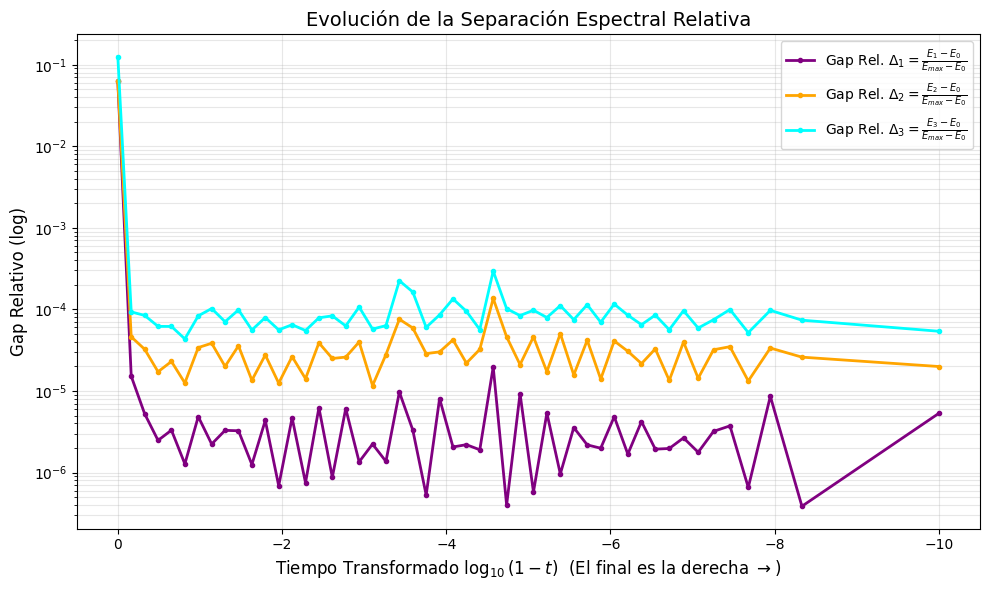


⚛️ ESTADO FINAL DEL SISTEMA (t=1.0):
   - Gap Relativo (E1): 5.33e-06
   - Energía Base (E0): -2023373.3859
   - Configuración:     [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

💰 CARTERA FINAL SELECCIONADA (Coste: 1000.17€):
   - CAT: 3 u.
   - NFLX: 2 u.
   - CF: 5 u.
   - ROK: 2 u.


In [14]:
import matplotlib.pyplot as plt
import numpy as np


# --- PREPARACIÓN DE DATOS ---
t_values_linear = df_results_linear['t'].values
t_values_log = df_results_log['t'].values
# Eje X transformado: log10(1 - t) para hacer zoom en el final (t -> 1)
x_axis_linear = t_values_linear 
x_axis_log = np.log10(1.0 - t_values_log + 1e-10) 


# Calculamos ancho de banda W = Emax - E0 para los gaps relativos
width_log = df_results_log['Emax'] - df_results_log['E0']
width_log = width_log.replace(0, 1.0) # Evitar división por cero

# ------------------------------------------------------------------------------
# GRÁFICO GAPS RELATIVOS MÚLTIPLES EN ESCALA LOGARÍTMICA
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))

gaps_a_pintar = [1, 2, 3] 
colores_gaps = ['purple', 'orange', 'cyan']

for i, color in zip(gaps_a_pintar, colores_gaps):
    if f'E{i}' in df_results_log.columns:
        # Gap Absoluto
        gap_abs = df_results_log[f'E{i}'] - df_results_log['E0']
        # Gap Relativo
        gap_rel = gap_abs / width_log
        
        plt.plot(x_axis_log, gap_rel, '.-', color=color, linewidth=2, 
                 label=r'Gap Rel. $\Delta_{%d} = \frac{E_%d - E_0}{E_{max} - E_0}$' % (i, i))

plt.xlabel(r"Tiempo Transformado $\log_{10}(1-t)$  (El final es la derecha $\to$)", fontsize=12)
plt.ylabel("Gap Relativo (log)", fontsize=12)
plt.title("Evolución de la Separación Espectral Relativa", fontsize=14)
plt.yscale('log') # Escala log para ver detalles finos
plt.legend(loc='best')
plt.grid(True, alpha=0.3, which='both')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# REPORTE DE RESULTADOS LOGARITMICOS
# ------------------------------------------------------------------------------
final = df_results_log.iloc[-1]
solucion_bits = final['best_bits']
gap_final_rel = final['gap_rel']

print(f"\n⚛️ ESTADO FINAL DEL SISTEMA (t=1.0):")
print(f"   - Gap Relativo (E1): {gap_final_rel:.2e}")
print(f"   - Energía Base (E0): {final['E0']:.4f}")
print(f"   - Configuración:     {solucion_bits}")

# Interpretación Financiera
acciones = q_model.decode_sample(solucion_bits)
coste = np.dot(acciones, precios_actuales)

print(f"\n💰 CARTERA FINAL SELECCIONADA (Coste: {coste:.2f}€):")
for t, n in zip(tickers, acciones):
    print(f"   - {t}: {n} u.")

### 5. Análisis de Complejidad: Comparativa Clásico vs. Cuántico

En esta sección evaluamos la dificultad intrínseca de resolver la cartera generada desde dos paradigmas computacionales distintos. No buscamos solo "la solución", sino entender **cuánto cuesta encontrarla**.

#### 🅰 Complejidad Clásica (Empírica)
Para un ordenador clásico, la dificultad se manifiesta en la capacidad de los algoritmos heurísticos para escapar de mínimos locales.

**Métrica utilizada:** *Tasa de Acierto del Simulated Annealing*.
1.  Calculamos el mínimo global verdadero ($E_{opt}$) usando un solver exacto (fuerza bruta).
    > *Nota: Esto solo es viable para problemas pequeños ($N < 25$ qubits).*
2.  Ejecutamos el algoritmo heurístico (Simulated Annealing) $M$ veces independientes.
3.  Definimos la complejidad ($C_{cl}$) como la probabilidad de fracaso:
    $$P(\text{éxito}) = \frac{\text{nº veces que } E_{sa} \approx E_{opt}}{M}$$

* **Alta Tasa de Acierto ($>90\%$):** Problema "Fácil" (Paisaje convexo o simple).
* **Baja Tasa de Acierto ($<10\%$):** Problema "Difícil" (Paisaje rugoso, muchos mínimos locales profundos).

---

#### 🅱 Complejidad Cuántica (Hipótesis del Gap)
En la Computación Cuántica Adiabática, la complejidad no se mide por "intentos", sino por el tiempo de evolución ($T$) necesario para garantizar el estado fundamental. Según el Teorema Adiabático, $T \sim \Delta^{-2}$, donde $\Delta$ es el *gap espectral*.

**Hipótesis de la Cuasi-Degeneración:**
En problemas financieros, la dificultad suele provenir de la existencia de muchas soluciones casi idénticas en energía (degeneración). Esto comprime el espectro cerca del estado fundamental.

**Métrica utilizada:** *Gap Normalizado Mínimo ($\gamma$)*.
Analizamos la densidad de los primeros $k$ estados excitados para detectar esta compresión:

$$\gamma = \min_{i \in \{1..k\}} \left( \frac{E_i - E_0}{i} \right)$$

* **$\gamma$ Grande:** Los estados están bien separados. El sistema es robusto ante ruido y transiciones diabáticas. **(Complejidad Baja)**.
* **$\gamma$ Pequeño:** Existe una "sopa" de estados densamente empaquetados sobre el fundamental. El sistema requiere tiempos de evolución extremadamente largos o temperaturas muy bajas para no excitarse. **(Complejidad Alta)**.

In [12]:

# ---------------------------------------------------------
import contextlib
import os

print(f" Análisis de Complejidad Clásica para {len(tickers)} activos ({q_model.total_qubits} qubits)")

# 1. Obtener el "Ground Truth" (Solución Exacta)
#    Usamos tu solver de fuerza bruta para saber cuál es el mínimo real absoluto
print(" Calculando solución exacta por fuerza bruta (Ground Truth)...")
solver = PortfolioSolver(h, J)
sol_exacta, energia_exacta, _ = solver.solve_exact()
print(f"   🔹 Energía Mínima Real: {energia_exacta:.6f}")

# 2. Test de Estrés al Simulated Annealing
#    Ejecutamos el algoritmo heurístico N veces y medimos cuántas veces acierta
NUM_INTENTOS = 100  
aciertos = 0

print(f" Ejecutando {NUM_INTENTOS} intentos de Simulated Annealing...")

# Usamos esto para silenciar los prints del solver durante el bucle
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    for i in range(NUM_INTENTOS):
        # Hacemos una tirada rápida de Simulated Annealing
        _, energia_sa, _ = solver.solve_simulated_annealing(num_reads=100)
        
        # Verificamos si encontró el óptimo (con una pequeña tolerancia numérica)
        if abs(energia_sa - energia_exacta) < 1e-4:
            aciertos += 1

tasa_acierto = (aciertos / NUM_INTENTOS) * 100

# 3. Resultados
print("\n RESULTADOS DE COMPLEJIDAD CLÁSICA:")
print(f"   - Tasa de Acierto: {tasa_acierto:.1f}%")
if tasa_acierto > 95:
    print("    Complejidad BAJA: El algoritmo clásico encuentra la solución fácilmente.")
elif tasa_acierto > 50:
    print("    Complejidad MEDIA: El paisaje de energía tiene mínimos locales difíciles.")
else:
    print("    Complejidad ALTA: El problema es muy difícil para métodos heurísticos clásicos.")

 Análisis de Complejidad Clásica para 4 activos (16 qubits)
 Calculando solución exacta por fuerza bruta (Ground Truth)...
🕵️ Ejecutando Exact Solver (Validación)...
   🔹 Energía Mínima Real: -2023373.478219
 Ejecutando 100 intentos de Simulated Annealing...

 RESULTADOS DE COMPLEJIDAD CLÁSICA:
   - Tasa de Acierto: 30.0%
    Complejidad ALTA: El problema es muy difícil para métodos heurísticos clásicos.


 Analizando estructura espectral fina (10 niveles)...
⚛️ Motor Quimb Lineal: 16 qubits (Dim: 65536)


c:\Users\dielm\anaconda3\Lib\site-packages\scipy\sparse\_data.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  self.data.astype(dtype, casting=casting, copy=True),


   ... Diagonalizando H_problem ...

 Gaps Normalizados (Delta_i / i):
   - Nivel 1: Gap Abs=117.5000 -> Norm=117.5000
   - Nivel 2: Gap Abs=333.1250 -> Norm=166.5625
   - Nivel 3: Gap Abs=686.1250 -> Norm=228.7083
   - Nivel 4: Gap Abs=1123.5000 -> Norm=280.8750
   - Nivel 5: Gap Abs=1708.0000 -> Norm=341.6000
   - Nivel 6: Gap Abs=2381.2500 -> Norm=396.8750
   - Nivel 7: Gap Abs=3223.3750 -> Norm=460.4821
   - Nivel 8: Gap Abs=4182.0000 -> Norm=522.7500
   - Nivel 9: Gap Abs=5271.0000 -> Norm=585.6667

 MÉTRICA DE COMPLEJIDAD CUÁNTICA: 117.500000


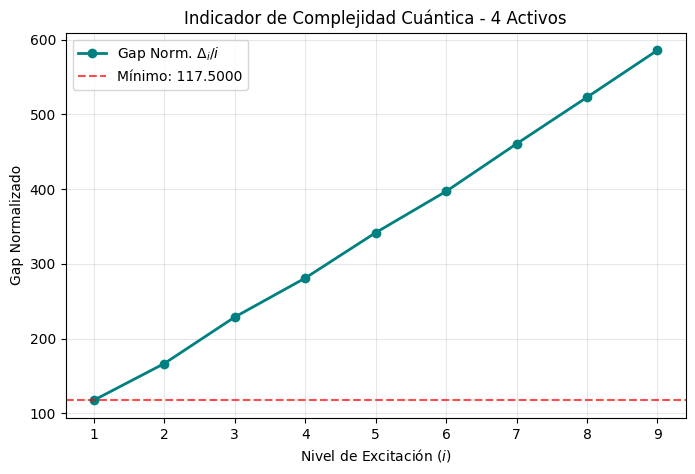

In [15]:

# -------------------------------------------------------------
from quantum_dynamics_lineal import IsingEvolver
import quimb as qu
import matplotlib.pyplot as plt
import numpy as np

# Configuración del estudio
K_NIVELES = 10 
print(f" Analizando estructura espectral fina ({K_NIVELES} niveles)...")

# 1. Instanciamos el motor
evolver_complex = IsingEvolver(h, J, q_model.total_qubits, k=K_NIVELES)

# 2. Diagonalizamos solo el Hamiltoniano del Problema (H_z)
print("   ... Diagonalizando H_problem ...")

# CORRECCIÓN AQUÍ:
# Si return_vecs=False, la función devuelve SOLO los valores. 
# Quitamos la coma y el guion bajo.
vals = qu.eigensystem_partial(
    evolver_complex.H_z, 
    k=K_NIVELES, 
    isherm=True, 
    which="SA", 
    tol=1e-3, 
    return_vecs=False  # Solo pedimos energías para ir rápido
)

# 3. Cálculo de la Métrica de Complejidad
vals = np.sort(vals) # Aseguramos orden ascendente
E0 = vals[0]
gaps_norm = []
indices = range(1, K_NIVELES)

print(f"\n Gaps Normalizados (Delta_i / i):")
for i in indices:
    if i < len(vals):
        E_i = vals[i]
        gap_abs = E_i - E0
        gap_norm = gap_abs / i
        gaps_norm.append(gap_norm)
        print(f"   - Nivel {i}: Gap Abs={gap_abs:.4f} -> Norm={gap_norm:.4f}")

if gaps_norm:
    min_metric = min(gaps_norm)
    print(f"\n MÉTRICA DE COMPLEJIDAD CUÁNTICA: {min_metric:.6f}")

    # 4. Visualización
    plt.figure(figsize=(8, 5))
    plt.plot(indices, gaps_norm, 'o-', color='teal', linewidth=2, label=r'Gap Norm. $\Delta_i/i$')
    plt.axhline(y=min_metric, color='red', linestyle='--', alpha=0.7, label=f'Mínimo: {min_metric:.4f}')

    plt.title(f"Indicador de Complejidad Cuántica - {len(tickers)} Activos")
    plt.xlabel("Nivel de Excitación ($i$)")
    plt.ylabel("Gap Normalizado")
    plt.xticks(indices)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
else:
    print("No se pudieron calcular los gaps (revisa K_NIVELES vs dimensión del sistema).")

### 6. Discusión: Degeneración y Complejidad Intrínseca

Una hipótesis fundamental en la física de la computación adiabática es que la **degeneración del estado fundamental** (o cuasi-degeneración, donde muchos estados tienen energías extremadamente cercanas a $E_0$) es el principal causante de la complejidad.

#### Propuesta de Estudio (No incluido en esta demo)
Para validar esta hipótesis rigurosamente, el procedimiento ideal —que se detalla en la memoria del trabajo pero excede el alcance computacional de esta demo— sería:

1.  Generar un conjunto estadísticamente significativo de carteras aleatorias.
2.  Para cada cartera, calcular dos métricas independientes:
    * **Métrica Clásica:** Tasa de éxito del *Simulated Annealing* (probabilidad de hallar el óptimo real).
    * **Métrica Cuántica:** El **Gap Normalizado Mínimo** ($\Delta_{norm} = \min_i \frac{E_i - E_0}{i}$) obtenido por diagonalización exacta.
3.  **Correlación:** Realizar un *scatter plot* de **Gap vs. Tasa de Acierto**.

**Hipótesis:** Se esperaría observar una correlación positiva. Las carteras con gaps normalizados muy pequeños (alta densidad de estados cerca del fundamental) deberían corresponder a las instancias donde el *Simulated Annealing* falla más a menudo, confirmando que la estructura del espectro de energía es el origen físico de la dificultad computacional.

> **Nota:** Este estudio requiere muchas horas de CPU para diagonalizar miles de matrices y ejecutar millones de *annealings*, por lo que no se realiza en tiempo real en este notebook.